In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('ex1.csv')

# Data Split

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
data.head(3)

,pair,mins,price,entry,exit value
0,A,5,100,0,0
1,A,10,200,1,A-20
2,A,15,300,0,0


In [6]:
X = data.drop(['entry','pair', 'exit value'], axis=1)
y= data['entry']

In [7]:
# run non-random split (test set is the last few rows of data)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2 , shuffle = False)

In [8]:
# run stratified split (random by default)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.5 , stratify= data['pair'] )

In [9]:
X_test.head(3)

,mins,price
115,10,200
128,5,500
124,10,600


# Random Forest
### 1. build first model

In [10]:
%%time

# import needed liberaries
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# fit the model
clas = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', n_jobs=-1)
clas.fit(X_train, y_train)

# get model predictions
y_pred = clas.predict(X_test)

Wall time: 414 ms


### 2. Assess model performance

Accuracy: 0.895
Null Accuracy: 0    0.651163
Name: entry, dtype: float64
k-fold Accuracies mean: 0.929
k-fold Accuracies std: 0.059
_______________________________________________


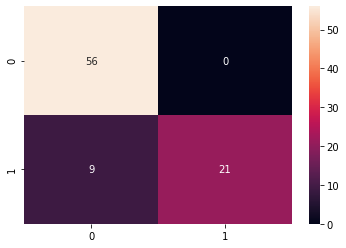

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        56
           1       1.00      0.70      0.82        30

    accuracy                           0.90        86
   macro avg       0.93      0.85      0.87        86
weighted avg       0.91      0.90      0.89        86

__________________________
Feature Importance

       importance
mins     0.595871
price    0.404129
__________________________
Wall time: 1.22 s


In [21]:
%%time

# 1. Accuracy Score 
print(f'Accuracy: {round(clas.score(X_test, y_test), 3)}')
print(f'Null Accuracy: { y_test.value_counts().head(1)/ len(y_test)}')

# 2. K-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clas, X = X_train, y = y_train, cv = 10, n_jobs= -1 )
print(f'k-fold Accuracies mean: {round(accuracies.mean(), 3)}')
print(f'k-fold Accuracies std: {round(accuracies.std(), 3)}')
print('_______________________________________________')

# 3. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.ylim(2,0)
plt.show()

# 4. Summary report
print(classification_report(y_test, y_pred))


# 5. Feature Importance
print('__________________________')
print('Feature Importance')
print()
print(pd.DataFrame(clas.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False) )
print('__________________________')


In [105]:
# 5. important features?
feature_importances = pd.DataFrame(clas.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [106]:
feature_importances

,importance
mins,0.560801
price,0.439199


### 3. Apply GridSearchCV to fine-tune hyperparameters

In [100]:
%%time
from sklearn.model_selection import GridSearchCV

# set the parameters to test
parameters = [{'n_estimators' : [30, 50, 100, 200], 'criterion': ['entropy']},
              {'n_estimators' : [30, 50, 100, 200], 'criterion': ['gini']}
             ]

# set GridSearchCV
grid_search = GridSearchCV(estimator = clas,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1)

# fit 
grid_search = grid_search.fit(X_train, y_train)

# get best accuracy and parameters
cv_results = (pd.DataFrame( grid_search.cv_results_ ))
pd.options.display.max_colwidth = 100
cv_results[['params', 'mean_test_score', 'std_test_score',
            'rank_test_score']].sort_values(by ='rank_test_score').head(10)

Best Accuracy: 0.906
Best Parameters: {'criterion': 'entropy', 'n_estimators': 30}
Wall time: 5.29 s


Score: 0.884
k-fold Scores mean: 0.91
k-fold Scores std: 0.109
_______________________________________________


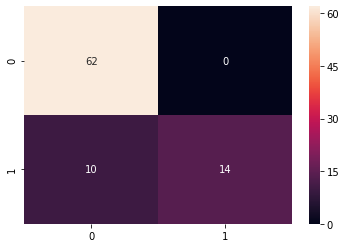

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        62
           1       1.00      0.58      0.74        24

    accuracy                           0.88        86
   macro avg       0.93      0.79      0.83        86
weighted avg       0.90      0.88      0.87        86

Wall time: 2.15 s


In [102]:
%%time

# import needed liberaries
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# fit the model
clas = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', n_jobs=-1)
clas.fit(X_train, y_train)

# get model predictions
y_pred = clas.predict(X_test)


# 1. Score (for training set goodness of fit)
print(f'Score: {round(clas.score(X_test, y_test), 3)}')

# 2. K-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clas, X = X_train, y = y_train, cv = 10, n_jobs= -1 )
print(f'k-fold Scores mean: {round(accuracies.mean(), 3)}')
print(f'k-fold Scores std: {round(accuracies.std(), 3)}')
print('_______________________________________________')

# 3. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.ylim(2,0)
plt.show()

# 4. Summary report
print(classification_report(y_test, y_pred))

## how to prepare loops of experiments and leave them running at night and see performance graphs next day?